# HW 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn import manifold 
from sklearn.preprocessing import scale



## Question 1 (Coding Question)

There is a gene expression data set `Gene_expression.csv` that consists of 40 tissue samples with measurements on 1,000 genes. This is the feature matrix $X$. 

In [2]:
X = pd.read_csv('Gene_expression.csv').T
X.head()

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
-0.9619334,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,-0.744782,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
0.4418028,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,0.796082,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
-0.9750051,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,0.578544,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,-1.128211,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
0.8188148,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,-1.070943,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


Additional information: The first 20 samples are from healthy patients, while the second 20 are from a diseased group. 

In [3]:
healthy = 0*np.ones(20)
disease = 1*np.ones(20)
disease_status = np.concatenate([healthy, disease])

In [4]:
#disease_status=disease_status.reshape(-1,1)
disease_status.shape

(40,)

1. Visualize the data based on the first two prinicipal components. The X-Axis should be the first Gene and Y-Axis should be the second Gene. You must scale the feature matrix X. 

In [5]:
X = pd.DataFrame(scale(X))
X.shape

(40, 999)

In [6]:
pcamod = PCA(n_components=6)
pcplot = pd.DataFrame(pcamod.fit_transform(X))
pcplot.columns = ['pc{}'.format(i+1) for i in range(pcplot.columns.size)]
pcplot.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,8.471412,3.630497,2.728740,2.716102,-7.264276,-1.422447
1,8.611246,6.551389,2.105650,3.921243,1.001055,-6.429892
2,9.675407,0.706342,0.546872,-1.180890,1.613613,8.402658
3,7.329495,12.212341,8.408548,-7.591762,-0.978803,4.587931
4,9.422452,-9.389610,3.190492,3.410711,7.496245,-10.871117


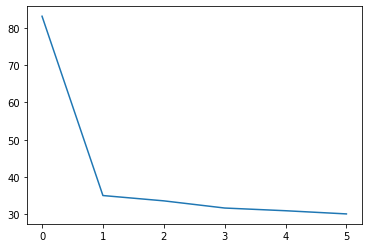

In [7]:
plt.plot(pcamod.explained_variance_)

Text(0, 0.5, 'Gene2')

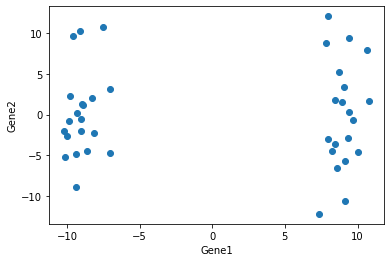

In [8]:
plt.scatter(pcplot.iloc[:,0], -pcplot.iloc[:,1])
plt.xlabel('Gene1')
plt.ylabel('Gene2')

2. Fit a PCA with 10 components. Visualize the data based on the first two prinicipal components with color code with respect to the disease status. The X-Axis should be the first Principal Component and Y-Axis should be the second Principal Component. Before you apply PCA, you must scale the data. 

In [9]:
X = pd.read_csv('Gene_expression.csv').T
X = pd.DataFrame(scale(X))


X_scale  = pd.DataFrame(scale(X))
pca      = PCA(n_components = 10)
X_pca    = pd.DataFrame(pca.fit_transform(X))
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,8.571399,4.503114,2.203859,2.361879,-9.649256,1.969875,-2.124432,2.539779,-3.725081,1.221746
1,8.627576,5.723934,1.499568,3.746359,-0.706860,-8.448586,3.769151,-7.112657,9.507372,0.088753
2,9.654984,0.777295,0.829287,-0.297131,0.238950,10.390115,-0.608823,-4.607858,-8.201537,-7.942152
3,7.308575,10.550392,6.524884,-8.072127,-3.258878,7.018221,1.569274,-4.746794,-1.482223,-0.251832
4,9.416564,-7.625599,4.062916,5.942399,6.943184,-3.980243,5.291233,6.725913,-1.114790,6.608736


Text(0, 0.5, 'PCA2')

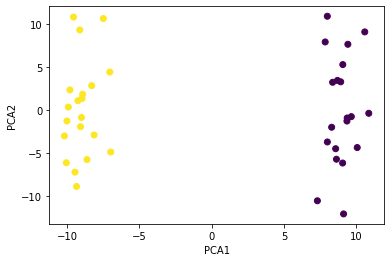

In [10]:
color_idx = pd.factorize(disease_status)[0]

#disease_status
plt.scatter(X_pca.iloc[:,0], -X_pca.iloc[:,1], c=color_idx)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

3. Explain what you see in the difference of the two plots above ?

   -there shoudlnt be a difference in the the two plots above. Even through both models have a different number of principle components that doesnt change how the first two components look/behave.

4. Calculate the total proportion of variance in the data captured by the first 10 principal components. Then Calculate the sum of the proportion of variance in the data captured only by first 2 principal components. 

the total varience explained by the first 10 principle components is below:


In [11]:
pca.explained_variance_ratio_.sum()

0.3529673782893771

The sum of the proportion explained by the first 2 principle components is below

In [12]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.11555519448710803

5. Draw the scree plot displaying the proportion of variance explained by the first 10 principal components. Using the elbow method, how many number of principal components might me enough. 

As you can see from the second plot the proportion of vrience explained even by the largest eigen value only explaines roughly 12.3 % of varience and in total , all 10 components only explain less that 40 percent of the total vaience . this being sai=d the elbow method tell us that the first two principle component should be enough.

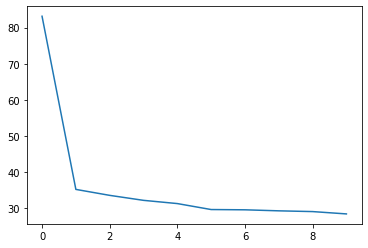

In [13]:
plt.plot(pca.explained_variance_)

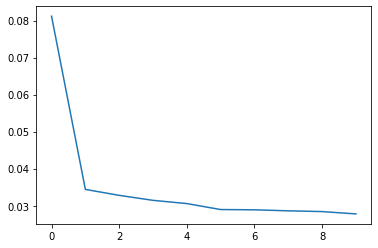

In [14]:
plt.plot(pca.explained_variance_ratio_)

6. Visualize the data on the first two Kernel Principal components using radial kernel and with gamma = 1. Color code using the disease status.

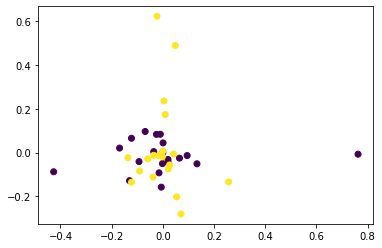

In [15]:
X = pd.read_csv('Gene_expression.csv').T
X.head()
X = pd.DataFrame(scale(X))


kpca   = KernelPCA(n_components = 2, kernel="rbf", gamma=1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],c =color_idx )

7. Visualize the data on the 2 component t-SNE. Try  perplexity = 5, 10, 20, 50 and 100. And plot only one you think is appropriate. 

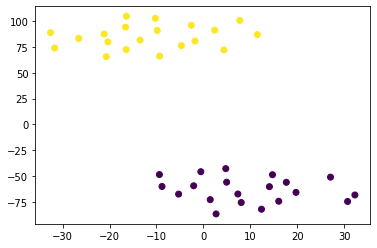

In [16]:
tsne = manifold.TSNE(n_components=2, init='random',perplexity = 10 ,random_state=0)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_idx)

8. Can you explain why perplexity = 50 and 100 did not work for tSNE above ?

As we increase the perplexity value we also descrease the flexability of the model in a sense , you can see that when we increase the perplexity we end up with a plot that looks closer to the kernal pca

9. From the above dimension reduction, which one do you think is appropriate for the data ? 

i think that both our first PCS model or this most recent T-SNE model can both be viable options to visualize the clusering going on 
the kernal pca model looks alot like the T-SNE model with a perplexity of 50

## Question 2 (Theoretical Question) 

The derivation can be written on the paper and you can attach the screenshot here.  

1. Show that if A is a **symmetric matrix** $(A = A^T)$, then the **eigen vectors must be orthogonal**. (Hint: let $x_1$ and $x_2$ be two eigen vectors of A and the corresponding eigen values be $\lambda_1$ and $\lambda_2$ and $\lambda_1 \neq \lambda_2$. You need to show that $x^T_1x_2$ = 0

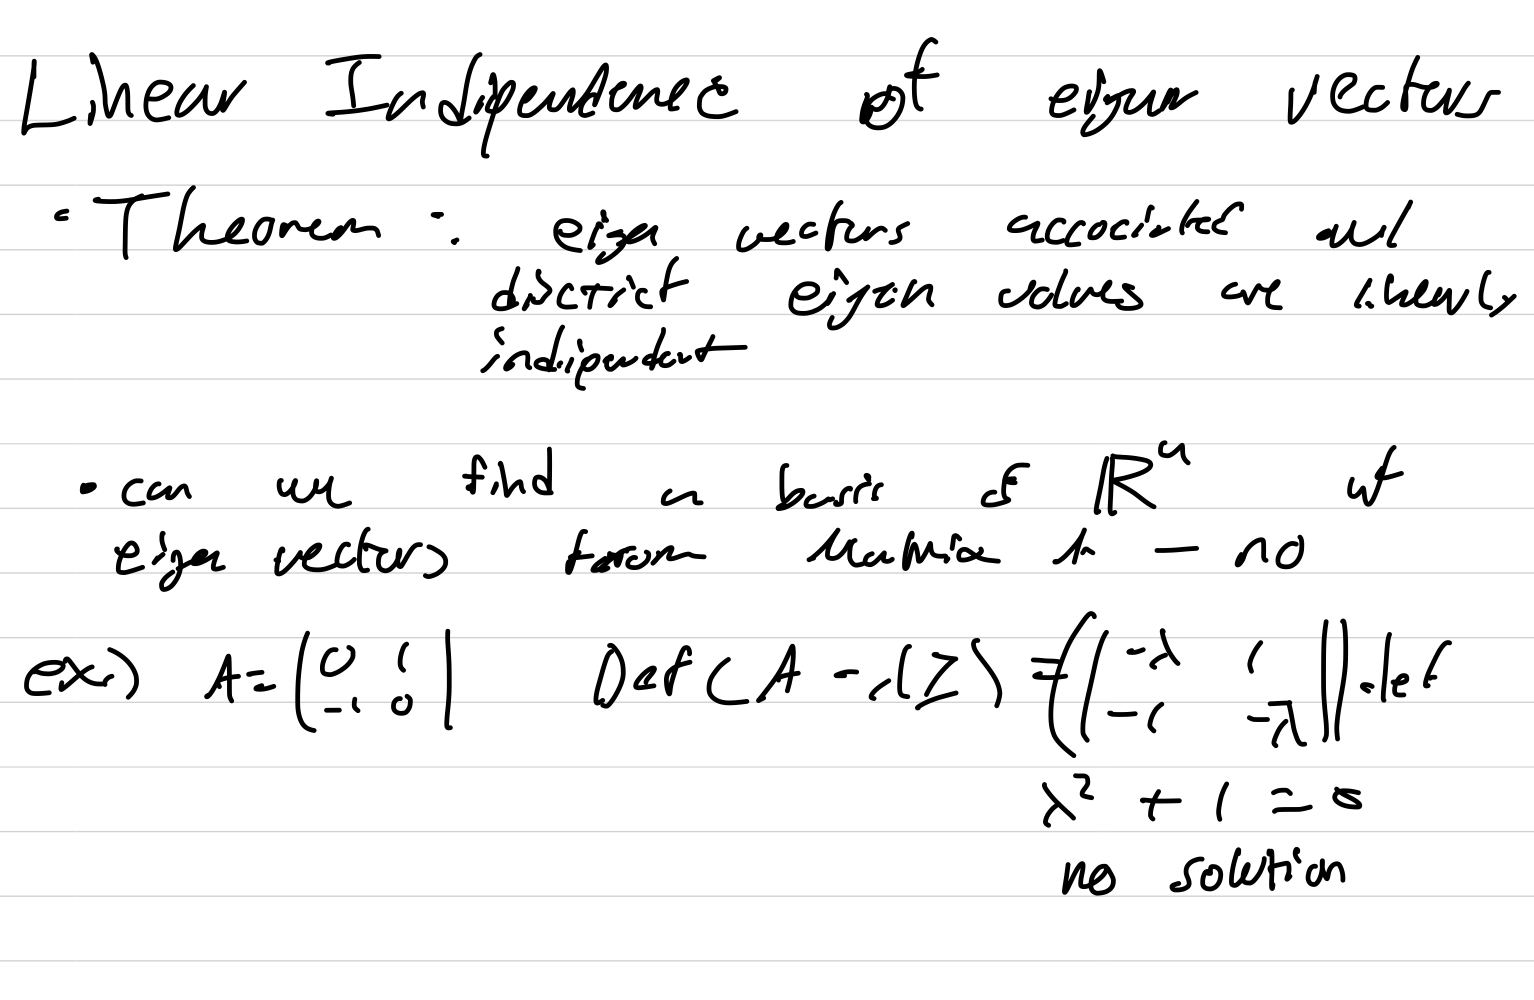

ax = lamba x  | ax2 = lamda2 x2
transpose A on both sides
multiply both sides by x2

2. Let $\Sigma$ be the sample covariance matrix of the feature matrix. That is $\Sigma = \frac{1}{n}X^TX$, $n =$ number of obervations. Prove that $\Sigma$ is **always a non-negative definite matrix**. (Hint: a matrix A is non negative definite matrix if for any non zero vector $u$,  $u^TA u \geq 0$ and  $u^Tu = \sum u_i^2 \geq 0$ )

- due to normalization of the origonal matrix the calculation of the covarience matrix will look something like this: $1/n*\sum_{i=1}^{n}x_{ia}*x_{ib}$. We already know that because this is a covarience matrix , matrix will be symmetric where the off-diagonals represent the covarience between the respective variables and the diagonals are the variences amoung the various componets    

\sigma  = 1/ x^tx
llook up definate matrix 

3. Using question 2, prove that the **eigen values** of the covariance matrix $\Sigma$ is always going to be $\geq 0$ (either 0 or positive).

we now know that the covarience matrix is positive and symmetric we know that the eigen vectors and values ae also real and positive 

4. If we order the eigen values of the covariance matrix, $\Sigma$, such that, $\lambda_1 \geq \lambda_2 \geq \lambda_3 \geq ..... \geq \lambda_n$. 


(a). The lowest value $\lambda_n$ can take is 0


(b). $\lambda_1$ represent the variance captured by the 1st principal component. 


(c). $\lambda_2$ represent the variance captured by the 2nd principal component. 


(d). The first principal component or the loading is the eigen value corresponding to the largest eigen vector, is the direction along whihc the data have the largest variance. 


(e). The first and third principal compoents should be parrallel to each other. 


(f). The total variance captures by the first K principal components would be equal to $ \sum_{i = 1}^{K}\lambda_i$


(g) Can these vectors qualify to be two principal components or loadings ? . Explain your answer.

[ 1,0, 0 , 0 , 0 ] and [0,0,0,1,0] , in order to see if these two vectors can be considered to be principle components , then their dot product should either be 0 or they can be realized with a scaler , these two vectors are not parallel and their dot product is 0 so it seems that they can be principle components 


(h) Can these vectors qualify to be two principal components or loadings ?. Explain your answer.

[ 1, 0, 0 , 0 , 1 ] and [0,1,0,1,0] again, the same logic here applies , these two vectors cannot be made from one another thus they are not parallel , their dot product is is also 0 , they can possibly be principle components  

## Question 3 (Coding Question) Dimension Reduction on the MNIST Image Data. 

One of the most important applications of PCA is for speeding up machine learning algorithms. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

In [17]:
# Download and Load the Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [18]:
# Download and Load the Data
from sklearn.datasets import load_digits
digits = load_digits()

The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [19]:
X = mnist.data 
y = mnist.target

In [20]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [21]:
print(digits.data.shape)

(1797, 64)


In [22]:
format(y)

"['5' '0' '4' ... '4' '5' '6']"

#### Plot the data to check what these images look like. 

Pick a sample to plot and covert the 1D numpy array of size 784 to a 2D array of sixze 28 by 28 and then plot using plt.imshow( ) for 2D image. 

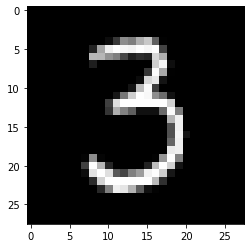

In [23]:
# pick a sample to plot and covert the 1D numpy array of size 784 to a 2D array of sixze 28 by 28
image = np.reshape(X[50, :], (28, 28)) 
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In order to plot multiple digits, you can use a “for” loop, along with **matplotlib’s subplots** functionality. First, we will define two numpy arrays that contains the images and labels we want to plot. For simplicity, we can use the first 10 images as shown below:

we will initialize the figure and axes handles using **matplotlib’s subplots command**, then iteratively display the digit images and labels.

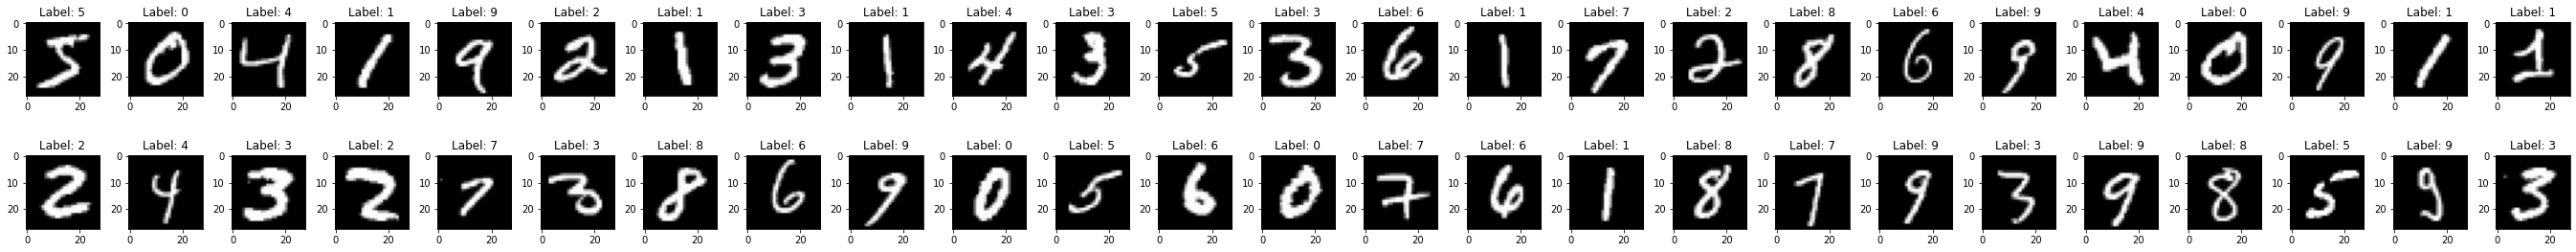

In [24]:
num  = 50
num_row = 2
num_col = 25
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    image = np.reshape(X[i, :], (28, 28))
    label = y[i]
    ax.imshow(image, cmap='gray')
    ax.set_title('Label: {}'.format(label))
plt.tight_layout()
plt.show()

1. Using the above command, display the first 50 digits with 5 rows and 10 columns.

### Standardize the DATA
PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

2. Apply standardization to data set.

In [25]:
X_new  = X[:1000,:]
y_new  = y[:1000]

X_new = scale(X_new)


3. Apply PCA on the training data. 

(a) Apply PCA with first 50 components, first 100 components and first 225 components and first 330 components  

(b) Calculate the total percentage of variance captures by each PCA transformation

In [26]:
pca_50    = PCA(n_components = 50).fit(X_new)
pca_100   = PCA(n_components = 100).fit(X_new)
pca_225   = PCA(n_components = 225).fit(X_new)
pca_330   = PCA(n_components = 330).fit(X_new)

In [27]:
print(np.sum(pca_50.explained_variance_ratio_))

0.6903057636880698


In [28]:
print(np.sum(pca_100.explained_variance_ratio_))

0.8470349141519365


In [29]:
print(np.sum(pca_225.explained_variance_ratio_))

0.9652203305228848


In [30]:
print(np.sum(pca_330.explained_variance_ratio_))

0.9884502320889899


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

In [32]:
pcaplot = PCA(n_components = 330)
X_train.shape

(750, 784)

In [33]:
X_pca = pd.DataFrame(pcaplot.fit_transform(X_new))



4. Plot the training data on the first two principal components based on PCA with 330. 

Text(0, 0.5, 'PCA2')

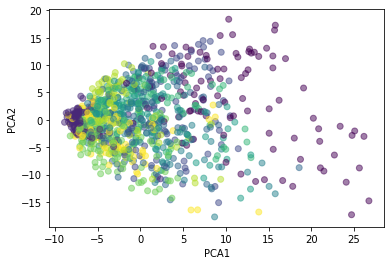

In [34]:
labels, indices = np.unique(y_new, return_inverse = True)
plt.scatter(X_pca.iloc[:,0],X_pca.iloc[:,1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

7. Plot the data on the first two principal components based on Kernel PCA with gamma = 1000

In [38]:
kpca   = KernelPCA(n_components = 2, kernel="rbf", gamma=1000, fit_inverse_transform=True)

X_kpca = pd.DataFrame(kpca.fit_transform(X_new) )



Text(0, 0.5, 'Kernel-PCA2')

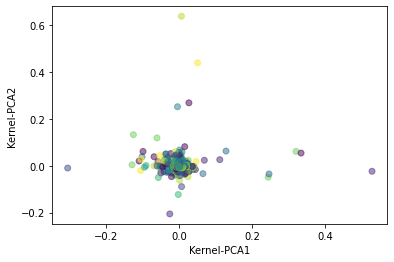

In [39]:

plt.scatter(X_kpca.iloc[:,0],X_kpca.iloc[:,1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('Kernel-PCA1')
plt.ylabel('Kernel-PCA2')

8. Plot the data on the first two principal components based on t-SNE with perplexity = 20, 50. 

Text(0, 0.5, 't-SNE2')

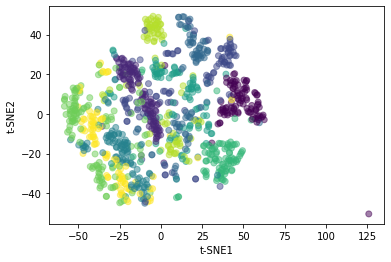

In [41]:
tsne = manifold.TSNE(n_components=2, init='random',perplexity = 20 ,random_state=0)
X_tsne = tsne.fit_transform(X_new)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

Text(0, 0.5, 't-SNE2')

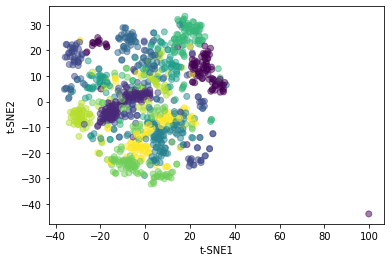

In [42]:
tsne = manifold.TSNE(n_components=2, init='random',perplexity = 50 ,random_state=0)
X_tsne = tsne.fit_transform(X_new)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

9. Plot the data on the first two principal components based on t-SNE with perplexity = 100

Text(0, 0.5, 't-SNE2')

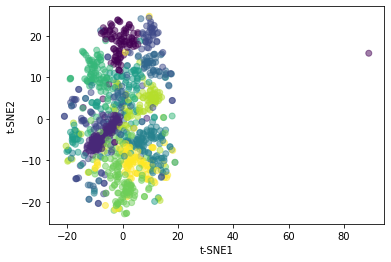

In [43]:
tsne = manifold.TSNE(n_components=2, init='random',perplexity = 100 ,random_state=0)
X_tsne = tsne.fit_transform(X_new)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

10. In future, if you want to classify the test images, which of the dimension reduction technique would you have used on the MNIST dataset above before applying your classfication ?

In the futre i see my self using T-SNE, as you can see above and below , T-SNe previde a very usful tuning parameter of perplexity as well as components. out of all the methods it seperated the data the most 

Text(0, 0.5, 't-SNE2')

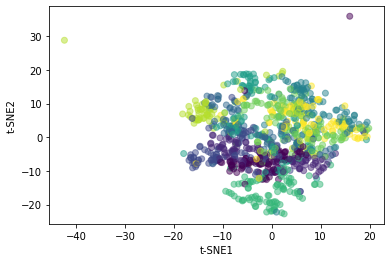

In [44]:
tsne = manifold.TSNE(n_components=3, init='random',perplexity = 11 ,random_state=0)
X_tsne = tsne.fit_transform(X_new)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = indices, marker = 'o', alpha = 0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')